<a href="https://colab.research.google.com/github/Jason-Richards76/Baseball-Pitch-Prediction/blob/master/Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pitches Columns
- px - location as pitch crosses the plate. X=0 means right down the middle
- pz - location as pitch crosses the plate. Z=0 means the ground
- start_speed - Speed of the pitch just as it's thrown
- end_speed - Speed of the pitch when it reaches the plate
- spin_rate - The pitch's spin rate, measure in RPM
- spin_dir - Direction in which pitch is spinning, measured in degrees
- break_angle
- break_length
- break_y
- ax
- ay
- az
- sz_bot
- sz_top
- type_confidence - Confidence in pitch_type classification. Goes up to 2 for some reason.
- vx0
- vy0
- vz0
- x
- x0
- y
- y0
- z0
- pfx_x
- pfx_z
- nasty
- zone
- codeRecords - the result of the pitch. See dataset description for list of codes and their meaning
- typeSimplified - code, S (strike) B (ball) or X (in play)
- pitch_type - Type of pitch. See dataset description for list of pitch types
- event_num - event number, used for finding when exactly ejections happen.
- b_score - score for the batter's team
- ab_id - at bat ID. Matches up with atbats.csv
- b_count - balls in the current count
- s_count - strikes in the current count
- outs - number of outs (before pitch is thrown)
- pitch_num - pitch number (of at-bat)
- on_1b - True if there's a runner on first, False if empty
- on_2b - True if there's a runner on second, False if empty
- on_3b - True if there's a runner on third, False if empty

At Bat Columns
- ab_idat - bat ID. First 4 digits are year. Matches with ab_id in pitches.csv
- batter_id - player ID of the batter. Given by MLB, player names found in player_names.csv
- event - description of the result of the at-bat
- g_id - game ID. First 4 digits are year
- inning - inning number
- o - number of outs after this at-bat
- p_score - score for the pitcher's team
- p_throws - which hand pitcher throws with. Single character, R or L
- pitcher_idplayer ID of the pitcher. Given by MLB, player names found in player_names.csv
- stand - which side batter hits on. Single character, R or L
- topTrue - if it's the top of the inning, False if it's the bottom

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pitches = pd.read_csv("pitches.csv")

In [0]:
atbats = pd.read_csv('atbats.csv')

In [0]:
pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,34.685,-11.960,1.72,3.56,2.0,-6.409,-136.065,-3.995,101.140000,2.280,158.780000,50.0,5.302,4.16,10.93,55.0,3.0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,34.225,-10.085,1.72,3.56,2.0,-8.411,-135.690,-5.980,124.280000,2.119,175.410000,50.0,5.307,6.57,12.00,31.0,5.0,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,35.276,-11.560,1.72,3.56,2.0,-9.802,-137.668,-3.337,136.740000,2.127,150.110000,50.0,5.313,7.61,10.88,49.0,1.0,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,28.354,-20.540,1.74,3.35,2.0,-8.071,-133.005,-6.567,109.685636,2.279,187.463482,50.0,5.210,1.17,6.45,41.0,13.0,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,21.774,-34.111,1.72,3.56,2.0,-6.309,-110.409,0.325,146.527525,2.179,177.242829,50.0,5.557,-8.43,-1.65,18.0,13.0,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [0]:
atbats.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [0]:
data = pd.merge(pitches, atbats, on = 'ab_id', how = 'left')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867154 entries, 0 to 2867153
Data columns (total 50 columns):
px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code               object
type               object
pitch_type         object
event_num          int64
b_score            float64
ab_id              float64
b

In [0]:
data1 = data.g_id.astype('str')

In [0]:
data1 = data1.str[:4]

In [0]:
data1.head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: g_id, dtype: object

In [0]:
data['year'] = data1.values

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867154 entries, 0 to 2867153
Data columns (total 51 columns):
px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code               object
type               object
pitch_type         object
event_num          int64
b_score            float64
ab_id              float64
b

In [0]:
data18 = data[data['year'] == '2018']

In [0]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724444 entries, 2142710 to 2867153
Data columns (total 51 columns):
px                 718322 non-null float64
pz                 718322 non-null float64
start_speed        718334 non-null float64
end_speed          718334 non-null float64
spin_rate          718322 non-null float64
spin_dir           718322 non-null float64
break_angle        718322 non-null float64
break_length       718322 non-null float64
break_y            718322 non-null float64
ax                 718322 non-null float64
ay                 718322 non-null float64
az                 718322 non-null float64
sz_bot             723353 non-null float64
sz_top             723353 non-null float64
type_confidence    718322 non-null float64
vx0                718322 non-null float64
vy0                718322 non-null float64
vz0                718322 non-null float64
x                  724444 non-null float64
x0                 718322 non-null float64
y                  724

In [0]:
data18.to_csv('mergebb.csv')

In [0]:
pXs = pd.DataFrame(data18[['code', 'type', 'pitch_type', 'b_score', 's_count', 'outs', 'pitch_num',\
                            'on_1b', 'on_2b', 'on_3b', 'batter_id', 'inning', 'p_score', 'p_throws',\
                             'pitcher_id', 'stand', 'top']])

In [0]:
pXs.head()

,code,type,pitch_type,b_score,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,inning,p_score,p_throws,pitcher_id,stand,top
2142710,C,S,SI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142711,B,B,SI,0.0,1.0,0.0,2.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142712,C,S,SI,0.0,1.0,0.0,3.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142713,F,S,SL,0.0,2.0,0.0,4.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142714,S,S,SI,0.0,2.0,0.0,5.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True


In [0]:
pXs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724444 entries, 2142710 to 2867153
Data columns (total 17 columns):
code          724444 non-null object
type          724444 non-null object
pitch_type    718322 non-null object
b_score       724444 non-null float64
s_count       724444 non-null float64
outs          724444 non-null float64
pitch_num     724444 non-null float64
on_1b         724444 non-null float64
on_2b         724444 non-null float64
on_3b         724444 non-null float64
batter_id     724444 non-null int64
inning        724444 non-null int64
p_score       724444 non-null int64
p_throws      724444 non-null object
pitcher_id    724444 non-null int64
stand         724444 non-null object
top           724444 non-null bool
dtypes: bool(1), float64(7), int64(4), object(5)
memory usage: 94.7+ MB


In [0]:
pXs.isnull().sum()

code             0
type             0
pitch_type    6122
b_score          0
s_count          0
outs             0
pitch_num        0
on_1b            0
on_2b            0
on_3b            0
batter_id        0
inning           0
p_score          0
p_throws         0
pitcher_id       0
stand            0
top              0
dtype: int64

In [0]:
pXs.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [0]:
pXs.dropna()

,code,type,pitch_type,b_score,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,inning,p_score,p_throws,pitcher_id,stand,top
2142710,C,S,SI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142711,B,B,SI,0.0,1.0,0.0,2.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142712,C,S,SI,0.0,1.0,0.0,3.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142713,F,S,SL,0.0,2.0,0.0,4.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142714,S,S,SI,0.0,2.0,0.0,5.0,0.0,0.0,0.0,446359,1,0,R,608665,R,True
2142715,C,S,SI,0.0,0.0,1.0,1.0,0.0,0.0,0.0,545361,1,0,R,608665,R,True
2142716,B,B,FF,0.0,1.0,1.0,2.0,0.0,0.0,0.0,545361,1,0,R,608665,R,True
2142717,T,S,FC,0.0,1.0,1.0,3.0,0.0,0.0,0.0,545361,1,0,R,608665,R,True
2142718,X,X,SI,0.0,2.0,1.0,4.0,0.0,0.0,0.0,545361,1,0,R,608665,R,True
2142719,C,S,SI,0.0,0.0,2.0,1.0,0.0,0.0,0.0,457708,1,0,R,608665,R,True


In [0]:
pXs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724444 entries, 2142710 to 2867153
Data columns (total 17 columns):
code          724444 non-null object
type          724444 non-null object
pitch_type    718322 non-null object
b_score       724444 non-null float64
s_count       724444 non-null float64
outs          724444 non-null float64
pitch_num     724444 non-null float64
on_1b         724444 non-null float64
on_2b         724444 non-null float64
on_3b         724444 non-null float64
batter_id     724444 non-null int64
inning        724444 non-null int64
p_score       724444 non-null int64
p_throws      724444 non-null int64
pitcher_id    724444 non-null int64
stand         724444 non-null object
top           724444 non-null bool
dtypes: bool(1), float64(7), int64(5), object(4)
memory usage: 94.7+ MB


In [0]:
pXs.p_throws = pXs.p_throws.replace(['R', 'L'], [0,1])

TypeError: ignored

In [0]:
pXs.stand = pXs.stand.replace(['R', 'L'], [0,1])

In [0]:
pXs.top = pXs.top.replace([True, False], [1,0])

In [0]:
pXs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724444 entries, 2142710 to 2867153
Data columns (total 17 columns):
code          724444 non-null object
type          724444 non-null object
pitch_type    718322 non-null object
b_score       724444 non-null float64
s_count       724444 non-null float64
outs          724444 non-null float64
pitch_num     724444 non-null float64
on_1b         724444 non-null float64
on_2b         724444 non-null float64
on_3b         724444 non-null float64
batter_id     724444 non-null int64
inning        724444 non-null int64
p_score       724444 non-null int64
p_throws      724444 non-null int64
pitcher_id    724444 non-null int64
stand         724444 non-null int64
top           724444 non-null int64
dtypes: float64(7), int64(7), object(3)
memory usage: 99.5+ MB


In [0]:
code = pXs.code

In [0]:
_type = pXs.type

In [0]:
pXs1 = pXs.drop(['code', 'type'], axis = 1)

In [0]:
pXs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724444 entries, 2142710 to 2867153
Data columns (total 15 columns):
pitch_type    718322 non-null object
b_score       724444 non-null float64
s_count       724444 non-null float64
outs          724444 non-null float64
pitch_num     724444 non-null float64
on_1b         724444 non-null float64
on_2b         724444 non-null float64
on_3b         724444 non-null float64
batter_id     724444 non-null int64
inning        724444 non-null int64
p_score       724444 non-null int64
p_throws      724444 non-null int64
pitcher_id    724444 non-null int64
stand         724444 non-null int64
top           724444 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 88.4+ MB


Pitch Type Definitions
- CH - Changeup
- CU - Curveball
- FC - Cutter
- FF - Four-seam Fastball
- FS - Splitter
- FT - Two-seam Fastball
- IN - Intentional ball
- KC - Knuckle curve
- KN - Knuckeball
- PO - Pitchout
- SC - Screwball
- SI - Sinker
- SL - Slider

In [0]:
pXs1.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [0]:
pXs1 = pXs1[pXs1.pitch_type != 'FA']
pXs1 = pXs1[pXs1.pitch_type != 'AB']
pXs1 = pXs1[pXs1.pitch_type != 'UN']
pXs1 = pXs1[pXs1.pitch_type != 'EP']

In [0]:
pXs1.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
PO        89
FO        84
SC        37
Name: pitch_type, dtype: int64

In [0]:
pXs1.pitch_type.replace('FO', 'PO', inplace=True)

In [0]:
pXs1.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
PO       173
SC        37
Name: pitch_type, dtype: int64

In [0]:
pXs1.isnull().sum()

pitch_type    6122
b_score          0
s_count          0
outs             0
pitch_num        0
on_1b            0
on_2b            0
on_3b            0
batter_id        0
inning           0
p_score          0
p_throws         0
pitcher_id       0
stand            0
top              0
dtype: int64

In [0]:
pXs1.dropna(inplace = True)

In [0]:
pXs1.isnull().sum()

pitch_type    0
b_score       0
s_count       0
outs          0
pitch_num     0
on_1b         0
on_2b         0
on_3b         0
batter_id     0
inning        0
p_score       0
p_throws      0
pitcher_id    0
stand         0
top           0
dtype: int64

In [0]:
pXs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718117 entries, 2142710 to 2867153
Data columns (total 15 columns):
pitch_type    718117 non-null object
b_score       718117 non-null float64
s_count       718117 non-null float64
outs          718117 non-null float64
pitch_num     718117 non-null float64
on_1b         718117 non-null float64
on_2b         718117 non-null float64
on_3b         718117 non-null float64
batter_id     718117 non-null int64
inning        718117 non-null int64
p_score       718117 non-null int64
p_throws      718117 non-null int64
pitcher_id    718117 non-null int64
stand         718117 non-null int64
top           718117 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 87.7+ MB


In [0]:
df = pXs1

In [0]:
df.to_csv('cleanbb.csv')

In [0]:
df.head()

,pitch_type,b_score,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,inning,p_score,p_throws,pitcher_id,stand,top
2142710,SI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142711,SI,0.0,1.0,0.0,2.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142712,SI,0.0,1.0,0.0,3.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142713,SL,0.0,2.0,0.0,4.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142714,SI,0.0,2.0,0.0,5.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1


In [0]:
features = df.drop('pitch_type', axis=1)  

In [0]:
features.head()

,b_score,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,inning,p_score,p_throws,pitcher_id,stand,top
2142710,0.0,0.0,0.0,1.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142711,0.0,1.0,0.0,2.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142712,0.0,1.0,0.0,3.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142713,0.0,2.0,0.0,4.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1
2142714,0.0,2.0,0.0,5.0,0.0,0.0,0.0,446359,1,0,0,608665,0,1


In [0]:
sns.pairplot(data = features)

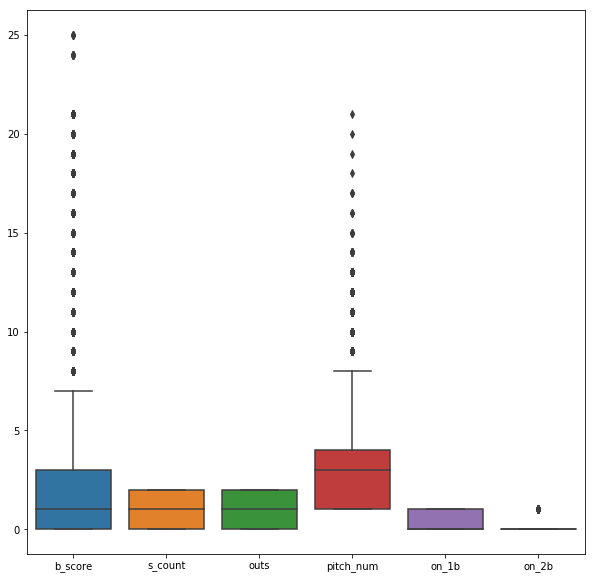

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features.iloc[:,:6])

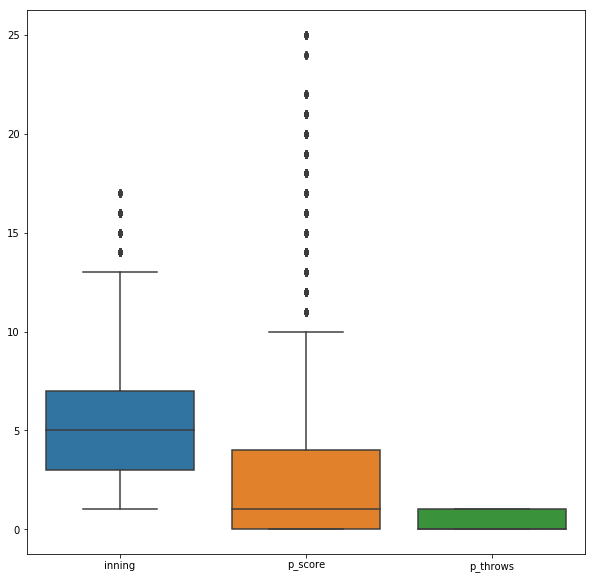

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features.iloc[:,8:11])

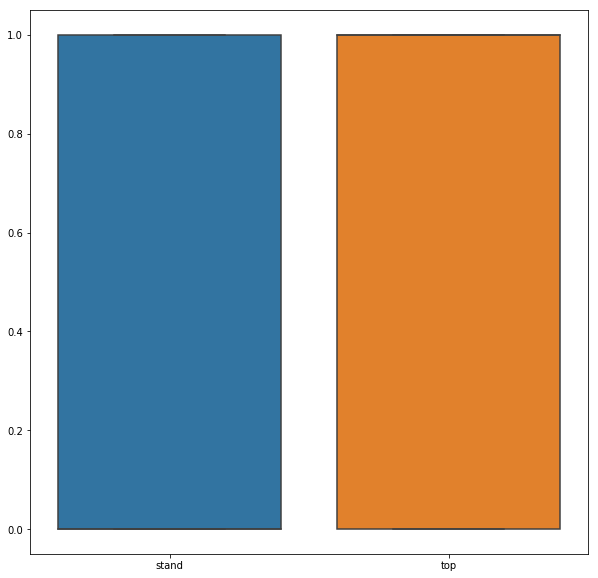

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features.iloc[:,12:])

Using a Robust Scaler due to the nature of the data and that outliers are going to play a role in the prediction. 

In [0]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit_transform(features)

array([[-0.33333333, -0.5       , -0.5       , ...,  0.34883101,
         0.        ,  0.        ],
       [-0.33333333,  0.        , -0.5       , ...,  0.34883101,
         0.        ,  0.        ],
       [-0.33333333,  0.        , -0.5       , ...,  0.34883101,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.5       ,  0.5       , ...,  0.48864329,
         1.        , -1.        ],
       [ 0.        ,  0.        ,  0.5       , ...,  0.48864329,
         1.        , -1.        ],
       [ 0.        ,  0.5       ,  0.5       , ...,  0.48864329,
         1.        , -1.        ]])

In [0]:
features.shape

(718117, 14)

In [0]:
target = df['pitch_type']

In [0]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

In [0]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [0]:
#create xgb instance with parameters¶
clf = xgb.XGBClassifier()
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
gbt_confusion_matrix
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CH       0.32      0.01      0.02     22332
          CU       0.38      0.00      0.01     18104
          FC       0.54      0.09      0.16     11786
          FF       0.38      0.98      0.54     76379
          FS       0.52      0.05      0.09      3128
          FT       0.56      0.06      0.10     24501
          KC       0.47      0.06      0.11      4858
          KN       0.86      1.00      0.92       225
          PO       0.25      0.02      0.04        52
          SC       0.00      0.00      0.00        15
          SI       0.62      0.16      0.25     17373
          SL       0.40      0.07      0.12     36683

    accuracy                           0.39    215436
   macro avg       0.44      0.21      0.20    215436
weighted avg       0.43      0.39      0.26    215436



In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

target_nn = target

le = LabelEncoder() #Initialize. le used as abbreviation fo label encoder
le.fit(target_nn)
print("Original class labels:")
print(list(le.classes_))
print('\n')
target_cat = le.transform(target_nn)  
#list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) #If you wish to retrieve the original descriptive labels post production

print('New product labels:')
print(target_cat)
print('\n')


print('One hot labels; 7 binary columns, one for each of the categories.') #Each row will be all zeros except for the category for that observation.
target_onehot = to_categorical(target_cat)
print(target_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(target_onehot))

Using TensorFlow backend.


Original class labels:
['CH', 'CU', 'FC', 'FF', 'FS', 'FT', 'KC', 'KN', 'PO', 'SC', 'SI', 'SL']


New product labels:
[10 10 10 ...  3  3  3]


One hot labels; 7 binary columns, one for each of the categories.
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


One hot labels shape:
(718117, 12)


In [0]:
import random
random.seed(123)
val = features[:100000]
train_final = features[100000:600000]
label_val = target_onehot[:100000]
label_train_final = target_onehot[100000:600000]
test = features[600000:]
label_test = target_onehot[600000:]

In [0]:
#packages to import
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

In [0]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(14,))) #1st hidden layer
model.add(layers.Dense(50, activation='relu'))#2nd hidden layer
model.add(layers.Dense(12, activation='softmax'))#output layer - softmax will return probability between 0-1

W0824 15:57:19.990022 140712599410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 15:57:20.034708 140712599410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 15:57:20.042618 140712599410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['accuracy'])

W0824 15:57:22.134972 140712599410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
  history = model.fit(train_final,
                      label_train_final,
                      epochs=20,
                      batch_size=1000,
                      validation_data=(val, label_val))

W0824 15:57:23.558715 140712599410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0824 15:57:23.634741 140712599410560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 500000 samples, validate on 100000 samples
Epoch 1/20
500000/500000 [==============================] - 6s 12us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 2/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 3/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 4/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 5/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 6/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 7/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584

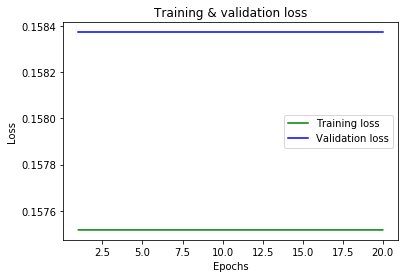

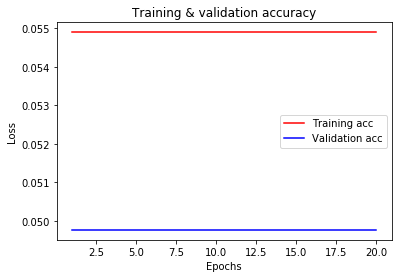

In [0]:
# loss visualization
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy visualization
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from keras.layers import Embedding, GRU, Dropout, GlobalMaxPool1D, Dense
#sample GRU model
gru_model = models.Sequential()
gru_model.add(Embedding(20000, 128))
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(GlobalMaxPool1D())
gru_model.add(Dropout(0.5))
gru_model.add(Dense(50, activation='relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(12, activation='softmax'))

W0824 15:58:14.142149 140712599410560 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['accuracy'])

In [0]:
  history = model.fit(train_final,
                      label_train_final,
                      epochs=20,
                      batch_size=1000,
                      validation_data=(val, label_val))

Train on 500000 samples, validate on 100000 samples
Epoch 1/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 2/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 3/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 4/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 5/20
500000/500000 [==============================] - 2s 4us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 6/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 - val_acc: 0.0498
Epoch 7/20
500000/500000 [==============================] - 2s 5us/step - loss: 0.1575 - acc: 0.0549 - val_loss: 0.1584 

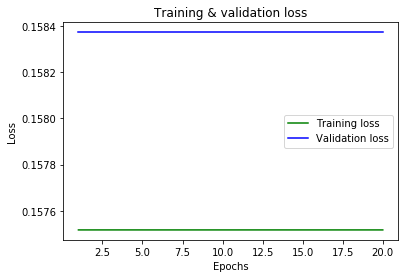

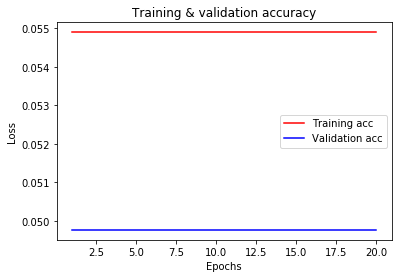

In [0]:
# loss visualization
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#accuracy visualization
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 40 columns):
px                 float64
pz                 float64
start_speed        float64
end_speed          float64
spin_rate          float64
spin_dir           float64
break_angle        float64
break_length       float64
break_y            float64
ax                 float64
ay                 float64
az                 float64
sz_bot             float64
sz_top             float64
type_confidence    float64
vx0                float64
vy0                float64
vz0                float64
x                  float64
x0                 float64
y                  float64
y0                 float64
z0                 float64
pfx_x              float64
pfx_z              float64
nasty              float64
zone               float64
code               object
type               object
pitch_type         object
event_num          int64
b_score            float64
ab_id              float64
b

In [0]:
pitches.describe()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
count,2.852965e+06,2.852965e+06,2.853040e+06,2.853040e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.865071e+06,2.865071e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.867154e+06,2.852965e+06,2.867154e+06,2.852965e+06,2.852965e+06,2.853012e+06,2.853012e+06,2.852965e+06,2.852965e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06
mean,6.572502e-03,2.254962e+00,8.838124e+01,8.136274e+01,1.731173e+03,1.802308e+02,5.848084e+00,6.601459e+00,2.381685e+01,-2.308512e+00,2.649175e+01,-2.278275e+01,1.566689e+00,3.435719e+00,1.550896e+00,2.282811e+00,-1.288567e+02,-4.420795e+00,1.159975e+02,-7.189111e-01,1.758503e+02,5.000000e+01,5.814139e+00,-1.139971e+00,5.046326e+00,4.442669e+01,9.819750e+00,3.129711e+02,2.256608e+00,2.016606e+09,8.824259e-01,8.810873e-01,9.826033e-01,2.894472e+00,3.018314e-01,1.860451e-01,9.595543e-02
std,8.927490e-01,9.463968e-01,6.015540e+00,5.364057e+00,6.827521e+02,6.742859e+01,2.443621e+01,1.331708e+02,6.446540e-02,1.074066e+01,4.142729e+00,8.865066e+00,1.549407e-01,2.172590e-01,5.537377e-01,5.990039e+00,8.726126e+00,3.067389e+00,3.409448e+01,1.728592e+00,2.960411e+01,3.120278e-14,4.578852e-01,6.275731e+00,5.187005e+00,1.683662e+01,4.060956e+00,1.928482e+02,2.550955e+00,1.117238e+06,9.665457e-01,8.251786e-01,8.174947e-01,1.726595e+00,4.590526e-01,3.891431e-01,2.945302e-01
min,-1.054333e+01,-5.183664e+00,3.390000e+01,3.240000e+01,1.214000e+00,-2.000000e-03,-9.000000e+01,1.000000e-01,2.330000e+01,-5.929009e+01,-5.243748e-01,-7.717142e+01,-7.921409e+00,-1.849129e+00,0.000000e+00,-2.486900e+01,-1.533620e+02,-1.977060e+01,0.000000e+00,-9.556000e+00,0.000000e+00,5.000000e+01,-1.941000e+00,-2.809165e+01,-7.020600e+01,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,2.015000e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.908243e-01,1.650000e+00,8.430000e+01,7.790000e+01,1.238745e+03,1.371540e+02,-1.190000e+01,4.300000e+00,2.380000e+01,-1.129000e+01,2.346000e+01,-2.871775e+01,1.485351e+00,3.300000e+00,9.060000e-01,-2.081861e+00,-1.355100e+02,-6.513000e+00,9.342000e+01,-1.955000e+00,1.606500e+02,5.000000e+01,5.564194e+00,-6.450000e+00,2.160000e+00,3.200000e+01,6.000000e+00,1.490000e+02,0.000000e+00,2.016004e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e-02,2.259000e+00,8.970000e+01,8.250000e+01,1.866322e+03,1.958850e+02,6.800000e+00,6.000000e+00,2.380000e+01,-3.142000e+00,2.647444e+01,-2.159500e+01,1.570000e+00,3.440000e+00,2.000000e+00,3.989000e+00,-1.308299e+02,-4.604841e+00,1.161400e+02,-1.333530e+00,1.771800e+02,5.000000e+01,5.842237e+00,-1.880000e+00,6.090000e+00,4.400000e+01,1.100000e+01,3.020000e+02,1.000000e+00,2.017004e+09,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.090000e-01,2.863000e+00,9.300000e+01,8.540000e+01,2.247564e+03,2.252340e+02,2.700000e+01,8.000000e+00,2.390000e+01,5.995827e+00,2.938409e+01,-1.574300e+01,1.658626e+00,3.578467e+00,2.000000e+00,6.625942e+00,-1.229450e+02,-2.488206e+00,1.392400e+02,7.766212e-01,1.936400e+02,5.000000e+01,6.104551e+00,3.864644e+00,8.950000e+00,5.600000e+01,1.300000e+01,4.640000e+02,3.000000e+00,2.018002e+09,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.295291e+01,1.488624e+01,1.050000e+02,9.690000e+01,6.539259e+03,3.600010e+02,2.694000e+02,2.248893e+05,3.640000e+01,4.097800e+01,5.405700e+01,2.230520e+01,1.069854e+01,1.054815e+01,2.000000e+00,2.515000e+01,-4.755200e+01,2.781500e+01,2.499500e+02,9.676000e+00,2.500000e+02,5.000000e+01,1.059600e+01,2.202000e+01,3.31

In [0]:
data2 = data18.drop(['event_num', 'type_confidence', 'ab_id', 'code', 'type', \
                     'event', 'g_id', 'year'], axis = 1)

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724444 entries, 2142710 to 2867153
Data columns (total 44 columns):
px              718322 non-null float64
pz              718322 non-null float64
start_speed     718334 non-null float64
end_speed       718334 non-null float64
spin_rate       718322 non-null float64
spin_dir        718322 non-null float64
break_angle     718322 non-null float64
break_length    718322 non-null float64
break_y         718322 non-null float64
ax              718322 non-null float64
ay              718322 non-null float64
az              718322 non-null float64
sz_bot          723353 non-null float64
sz_top          723353 non-null float64
vx0             718322 non-null float64
vy0             718322 non-null float64
vz0             718322 non-null float64
x               724444 non-null float64
x0              718322 non-null float64
y               724444 non-null float64
y0              718322 non-null float64
z0              718322 non-null float64
pf

In [0]:
data2.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [0]:
data2 = data2[data2.pitch_type != 'FA']
data2 = data2[data2.pitch_type != 'AB']
data2 = data2[data2.pitch_type != 'KN']
data2 = data2[data2.pitch_type != 'EP']
data2 = data2[data2.pitch_type != 'FO']
data2 = data2[data2.pitch_type != 'PO']
data2 = data2[data2.pitch_type != 'SC']

In [0]:
data2.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
Name: pitch_type, dtype: int64

In [0]:
data2.pitch_type.replace('FS', 'FF', inplace=True)
data2.pitch_type.replace('FC', 'FF', inplace=True)
data2.pitch_type.replace('FT', 'FF', inplace=True)
data2.pitch_type.replace('KC', 'CU', inplace=True)

In [0]:
data2.pitch_type.value_counts()

FF    385129
SL    122796
CU     76687
CH     74606
SI     57970
Name: pitch_type, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Initialize. le used as abbreviation fo label encoder
le.fit(features['event'])
print("Original class labels:")
print(list(le.classes_))
print('\n')
features['event'] = le.transform(features['event'])  
#list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) #If you wish to retrieve the original descriptive labels post production

Original class labels:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]




In [0]:
data2.p_throws = data2.p_throws.replace(['R', 'L'], [0,1])
data2.stand = data2.stand.replace(['R', 'L'], [0,1])
data2.top = data2.top.replace([True, False], [1,0])

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723310 entries, 2142710 to 2867153
Data columns (total 43 columns):
px              717188 non-null float64
pz              717188 non-null float64
start_speed     717200 non-null float64
end_speed       717200 non-null float64
spin_rate       717188 non-null float64
spin_dir        717188 non-null float64
break_angle     717188 non-null float64
break_length    717188 non-null float64
break_y         717188 non-null float64
ax              717188 non-null float64
ay              717188 non-null float64
az              717188 non-null float64
sz_bot          722219 non-null float64
sz_top          722219 non-null float64
vx0             717188 non-null float64
vy0             717188 non-null float64
vz0             717188 non-null float64
x               723310 non-null float64
x0              717188 non-null float64
y               723310 non-null float64
y0              717188 non-null float64
z0              717188 non-null float64
pf

In [0]:
data2 = data2.dropna()

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717188 entries, 2142710 to 2867153
Data columns (total 43 columns):
px              717188 non-null float64
pz              717188 non-null float64
start_speed     717188 non-null float64
end_speed       717188 non-null float64
spin_rate       717188 non-null float64
spin_dir        717188 non-null float64
break_angle     717188 non-null float64
break_length    717188 non-null float64
break_y         717188 non-null float64
ax              717188 non-null float64
ay              717188 non-null float64
az              717188 non-null float64
sz_bot          717188 non-null float64
sz_top          717188 non-null float64
vx0             717188 non-null float64
vy0             717188 non-null float64
vz0             717188 non-null float64
x               717188 non-null float64
x0              717188 non-null float64
y               717188 non-null float64
y0              717188 non-null float64
z0              717188 non-null float64
pf

In [0]:
target1 = data2.pitch_type

In [0]:
features1 = data2.drop('pitch_type', axis=1) 

In [0]:
sns.pairplot(data=features1);

KeyboardInterrupt: ignored

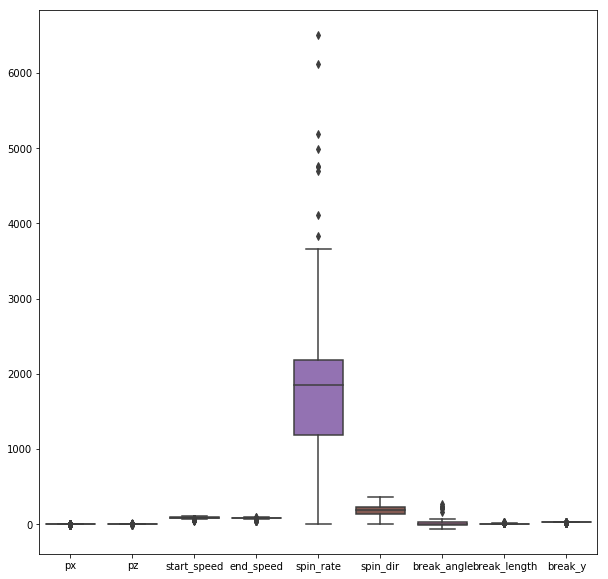

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features1.iloc[:,:9])

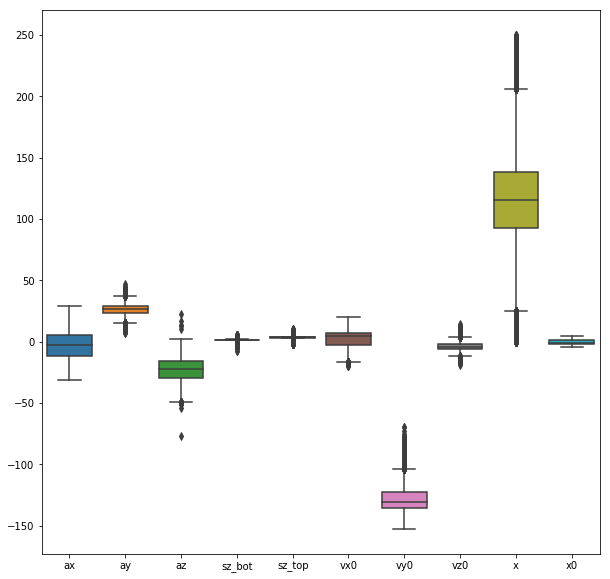

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features1.iloc[:,9:19])

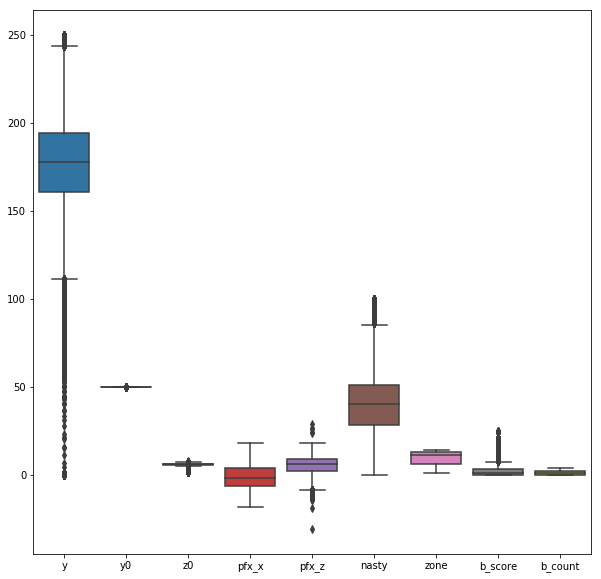

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features1.iloc[:,19:28])

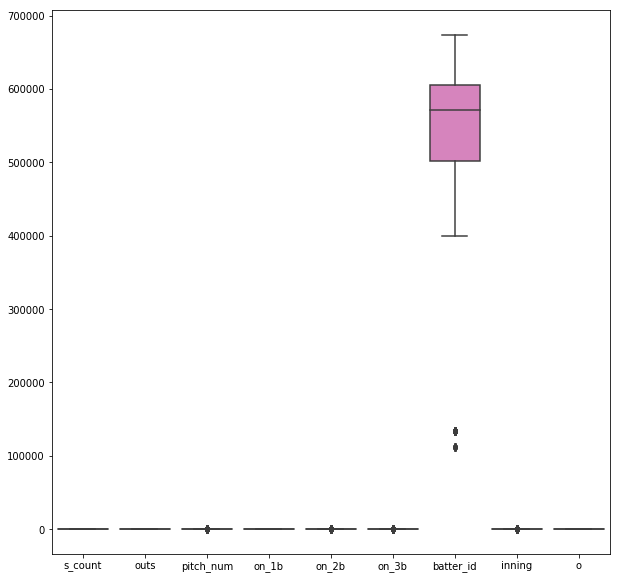

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features1.iloc[:,28:37])

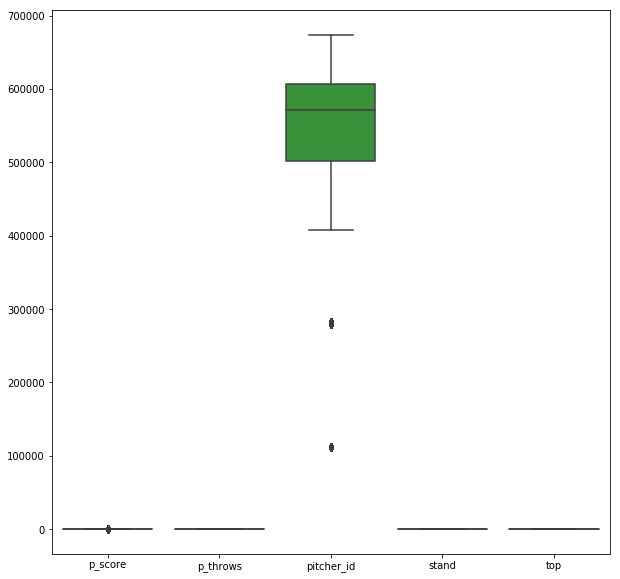

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(data=features1.iloc[:,37:44])

In [0]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit_transform(features1)

array([[ 0.16830352, -0.33009792,  0.43678161, ...,  0.34883101,
         0.        ,  0.        ],
       [-0.71260546, -1.08545051,  0.47126437, ...,  0.34883101,
         0.        ,  0.        ],
       [ 0.47133816, -0.51992501,  0.55172414, ...,  0.34883101,
         0.        ,  0.        ],
       ...,
       [-0.40919413,  0.30006343,  0.85057471, ...,  0.48864329,
         1.        , -1.        ],
       [-0.2532415 , -0.74908133,  0.68965517, ...,  0.48864329,
         1.        , -1.        ],
       [ 0.20200741,  0.46334724,  0.67816092, ...,  0.48864329,
         1.        , -1.        ]])

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

target1_nn = target1

le = LabelEncoder() #Initialize. le used as abbreviation fo label encoder
le.fit(target1_nn)
print("Original class labels:")
print(list(le.classes_))
print('\n')
target_cat = le.transform(target1_nn)  
#list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) #If you wish to retrieve the original descriptive labels post production

print('New product labels:')
print(target_cat)
print('\n')


print('One hot labels; 7 binary columns, one for each of the categories.') #Each row will be all zeros except for the category for that observation.
target_onehot = to_categorical(target_cat)
print(target_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(target_onehot))

Original class labels:
['CH', 'CU', 'FF', 'SI', 'SL']


New product labels:
[3 3 3 ... 2 2 2]


One hot labels; 7 binary columns, one for each of the categories.
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


One hot labels shape:
(717188, 5)


In [0]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(41,))) #1st hidden layer
model.add(layers.Dense(50, activation='relu'))#2nd hidden layer
model.add(layers.Dense(5, activation='softmax'))#output layer - softmax will return probability between 0-

In [0]:
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['accuracy'])

In [0]:
import random
random.seed(123)
val = features[:100000]
train_final = features[100000:600000]
label_val = target_onehot[:100000]
label_train_final = target_onehot[100000:600000]
test = features[600000:]
label_test = target_onehot[600000:]

In [0]:
  history = model.fit(train_final,
                      label_train_final,
                      epochs=20,
                      batch_size=1000,
                      validation_data=(val, label_val))

Train on 500000 samples, validate on 100000 samples
Epoch 1/20
500000/500000 [==============================] - 3s 6us/step - loss: 0.1999 - acc: 0.5000 - val_loss: 0.1848 - val_acc: 0.5381
Epoch 2/20
500000/500000 [==============================] - 3s 6us/step - loss: 0.1842 - acc: 0.5394 - val_loss: 0.1848 - val_acc: 0.5381
Epoch 3/20
500000/500000 [==============================] - 3s 6us/step - loss: 0.1842 - acc: 0.5394 - val_loss: 0.1848 - val_acc: 0.5381
Epoch 4/20
500000/500000 [==============================] - 3s 5us/step - loss: 0.1842 - acc: 0.5394 - val_loss: 0.1848 - val_acc: 0.5381
Epoch 5/20
500000/500000 [==============================] - 3s 5us/step - loss: 0.1842 - acc: 0.5394 - val_loss: 0.1848 - val_acc: 0.5381
Epoch 6/20
500000/500000 [==============================] - 3s 5us/step - loss: 0.1842 - acc: 0.5394 - val_loss: 0.1848 - val_acc: 0.5381
Epoch 7/20
500000/500000 [==============================] - 3s 6us/step - loss: 0.1842 - acc: 0.5394 - val_loss: 0.1848 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717188 entries, 2142710 to 2867153
Data columns (total 42 columns):
px              717188 non-null float64
pz              717188 non-null float64
start_speed     717188 non-null float64
end_speed       717188 non-null float64
spin_rate       717188 non-null float64
spin_dir        717188 non-null float64
break_angle     717188 non-null float64
break_length    717188 non-null float64
break_y         717188 non-null float64
ax              717188 non-null float64
ay              717188 non-null float64
az              717188 non-null float64
sz_bot          717188 non-null float64
sz_top          717188 non-null float64
vx0             717188 non-null float64
vy0             717188 non-null float64
vz0             717188 non-null float64
x               717188 non-null float64
x0              717188 non-null float64
y               717188 non-null float64
y0              717188 non-null float64
z0              717188 non-null float64
pf

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718117 entries, 2142710 to 2867153
Data columns (total 15 columns):
pitch_type    718117 non-null object
b_score       718117 non-null float64
s_count       718117 non-null float64
outs          718117 non-null float64
pitch_num     718117 non-null float64
on_1b         718117 non-null float64
on_2b         718117 non-null float64
on_3b         718117 non-null float64
batter_id     718117 non-null int64
inning        718117 non-null int64
p_score       718117 non-null int64
p_throws      718117 non-null int64
pitcher_id    718117 non-null int64
stand         718117 non-null int64
top           718117 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 87.7+ MB


In [0]:
df.pitch_type.value_counts()

FF    264451
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
KN       719
PO       173
SC        37
Name: pitch_type, dtype: int64

In [0]:
df = df[df.pitch_type != 'KN']
df = df[df.pitch_type != 'FO']
df = df[df.pitch_type != 'PO']
df = df[df.pitch_type != 'SC']

In [0]:
df.pitch_type.value_counts()

FF    385129
SL    122796
CU     76687
CH     74606
SI     57970
Name: pitch_type, dtype: int64

In [0]:
df.pitch_type.replace('FS', 'FF', inplace=True)
df.pitch_type.replace('FC', 'FF', inplace=True)
df.pitch_type.replace('FT', 'FF', inplace=True)
df.pitch_type.replace('KC', 'CU', inplace=True)

In [0]:
features2 = df.drop('pitch_type', axis=1) 

In [0]:
target2 = df.pitch_type

In [0]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(features2, target2, test_size=0.30)

In [0]:
#create xgb instance with parameters¶
clf = xgb.XGBClassifier()
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
gbt_confusion_matrix
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CH       0.30      0.00      0.00     22327
          CU       0.00      0.00      0.00     22940
          FF       0.54      1.00      0.70    115634
          SI       0.69      0.10      0.18     17507
          SL       0.54      0.01      0.02     36749

    accuracy                           0.55    215157
   macro avg       0.41      0.22      0.18    215157
weighted avg       0.47      0.55      0.40    215157



In [0]:
from sklearn.model_selection import GridSearchCV
xgb_param_grid = {"learning_rate": [.01,0.1,1],'max_depth': [2,6,10],'min_child_weight': [5,10,15],'n_estimators': [50, 100, 250]}
gs = GridSearchCV(clf, xgb_param_grid, n_jobs=-1, cv=3)
gs.fit(X_train, y_train)